<a href="https://colab.research.google.com/github/Brown-Deep-Learning/hw1-setup-khu55/blob/main/%E2%80%9CAssignment_2_Intro_to_Numpy_and_Tensorflow_for_Deep_Learning%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2: Numpy and Tensorflow for Deep Learning**

<font color="red">***Important: Before starting the assignment, please COPY this notebook into your OWN google drive by clicking on "File" and "Save a copy in drive"***</font>

---


# 🎯 **Mission Overview: Neural Intelligence Agency (NIA)**

Welcome DL research recruit! You have been selected to be a part of our super secret Neural Intelligence Agency, an elite underground agency run by Eric Ewing to solve the world's most challenging problems using AI. You need to complete the following training protocol to gain the require clearance to be able to build, train, and optimize the neural networks core to the NIA.


**You are required to complete the following 4 modules to earn your certification as a NIA recruit. This mission will cover the following topics:**

1. **Introduction to Numpy**
2. **Introduction to Tensorflow**
3. **Optimizers: The Learning Algorithms**
3. **Putting it All Together: Building a Model**

**Each module builds progressively and will be very useful for the next week's assignment, BERAS!**


---



# **Introduction to NumPy**

NumPy is a powerful Python library for numerical computing. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently. We recommend you can refer to this <ins>[this](https://www.w3schools.com/python)</ins> for details.

Whenever we want to work with NumPy, we need to import the library. The common convention is to use `import numpy as np` so we can short hand the calls to `np.()` and not have to write `numpy.()` each time.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42) # Set random seed for reproducible results
print(f"NumPy version: {np.__version__}")

NumPy version: 2.0.2


## **Why NumPy?**

Before we dive into NumPy arrays, let's understand why we don't just use regular Python lists. Regular Python is manually processing data one sample at a time, while NumPy can process thousands of samples simultaneously.

NumPy's speed comes from:

- Compiled C code under the hood (vs. interpreted Python)
- Vectorized operations that process arrays as single units
- Memory efficiency with homogeneous data types
- Optimized algorithms for mathematical operations

This performance advantage becomes crucial when working with large datasets and big data is essential for deep learning!

You can run the following code block to see the realized NumPy speed ups on simple array processing. You can see that the Python code requires a loop, but NumPy allows for vectorized operations where a single line can operate over the entire array, and does so much faster!

In [3]:
import time

# Let's simulate processing 1 million data points
data_size = 1000000

# Method 1: Pure Python (the slow way)
python_list = list(range(data_size))

start_time = time.time()
python_result = []  # Manual processing
for x in python_list:
    python_result.append(x * 2 + 1)
python_time = time.time() - start_time

# Method 2: NumPy (the fast way)
numpy_array = np.array(python_list)

start_time = time.time()
numpy_result = numpy_array * 2 + 1  # Vectorized processing
numpy_time = time.time() - start_time

print(f"Results match: {python_result[:5] == numpy_result[:5].tolist()}")
print(f"Processing {data_size:,} data points:")
print(f"Python list method: {python_time:.4f} seconds")
print(f"NumPy array method:  {numpy_time:.4f} seconds")
print(f"NumPy is {python_time/numpy_time:.1f}x faster!")

Results match: True
Processing 1,000,000 data points:
Python list method: 0.1479 seconds
NumPy array method:  0.0079 seconds
NumPy is 18.8x faster!


## **The Foundation: N-Dimensional Arrays**
NumPy's core data structure is the n-dimensional array (`ndarray`). Unlike Python lists, NumPy arrays:

- Store elements of the same data type (homogeneous)
- Have a fixed size once created
- Support efficient mathematical operations
- Can have multiple dimensions

The key advantage is that NumPy arrays are optimized for numerical computations and use contiguous memory, making operations much faster than Python lists.

In [4]:
# Creating some data arrays
sensor_readings = np.array([23.1, 24.5, 22.8, 25.2, 23.9])  # 1D: ex. temperature sensors
experimental_matrix = np.array([[1.2, 3.4, 2.1],
                               [2.8, 1.9, 4.2],
                               [3.1, 2.7, 1.8]])  # 2D: ex. experimental results

print("1D Sensor readings shape:", sensor_readings.shape)
print("2D Experimental matrix shape:", experimental_matrix.shape)
print("Data type:", sensor_readings.dtype)

1D Sensor readings shape: (5,)
2D Experimental matrix shape: (3, 3)
Data type: float64


## **Array Generation: Manufacturing Your Data**

Rather than manually typing array values, NumPy provides functions to generate arrays with specific patterns or properties.

Common array creation functions:

- `zeros()`, `ones()`: Arrays filled with 0s or 1s
- `arange()`: Sequences with regular steps
- `linspace()`: Evenly spaced values over an interval
- `eye()`: Identity matrices
- `full()`: Arrays filled with a specific value

In [5]:
zeros_matrix = np.zeros((3, 4))          # Initialize empty grid
ones_vector = np.ones(5)                 # Initialize ones array
identity_matrix = np.eye(3)              # Identity matrix
sequence = np.arange(0, 10, 2)           # Regular intervals: [0, 2, 4, 6, 8]
linear_space = np.linspace(0, 100, 11)   # 11 evenly spaced points from 0 to 100

print("Zeros matrix:")
print(zeros_matrix)
print("Linear space:")
print(linear_space)

Zeros matrix:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Linear space:
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


### **[TODO] ✅ Research Initalization**

Set up the arrays for our research facility in the block below:
1. Create a 'calibration_grid' - a 5x5 matrix filled with zeros
2. Create 'measurement_points' - 15 evenly spaced values from -5.0 to 5.0
3. Create 'time_steps' - integers from 0 to 20 (step of 1)
4. Print all three arrays

In [6]:
calibration_grid = np.zeros((5,5))
measurement_points = np.linspace(-5.0,5.0,15)
time_steps = np.arange(0,21,1)

print("Calibration grid:")
print(calibration_grid)
print("Measurement_points:")
print(measurement_points)
print("Time_steps:")
print(time_steps)

Calibration grid:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Measurement_points:
[-5.         -4.28571429 -3.57142857 -2.85714286 -2.14285714 -1.42857143
 -0.71428571  0.          0.71428571  1.42857143  2.14285714  2.85714286
  3.57142857  4.28571429  5.        ]
Time_steps:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


## **Mathematical Operations: Your Analytical Tools**

NumPy operations are vectorized by default, meaning they operate on entire arrays element-by-element without explicit loops. When you apply an operation like `+`, `-`, `*`, or `**` to NumPy arrays, the operation is applied to corresponding elements.

In [7]:
# Research measurements from two different techniques
technique_A = np.array([12.3, 15.7, 18.2, 22.1, 19.8])
technique_B = np.array([11.8, 16.2, 17.9, 21.8, 20.1])

# Analytical comparisons
difference = technique_A - technique_B           # Measurement differences
relative_error = difference / technique_A        # Relative error analysis
squared_diff = difference ** 2                  # Squared differences for variance

print("Measurement differences:", difference)
print("Relative errors:", relative_error)
print("Root mean squared error:", np.sqrt(np.mean(squared_diff)))

Measurement differences: [ 0.5 -0.5  0.3  0.3 -0.3]
Relative errors: [ 0.04065041 -0.03184713  0.01648352  0.01357466 -0.01515152]
Root mean squared error: 0.39242833740697197


## **Array Manipulation: Reshaping Your Data**

Reshaping changes the dimensions of an array without changing its data. The total number of elements must remain the same.
Key reshaping operations:

- `reshape()`: Change dimensions while keeping total elements constant
- `flatten()`: Convert any array to 1D
- `transpose()` or `.T`: Swap array dimensions
- `squeeze()`: Remove dimensions of size 1
- `expand_dims()`: Add new dimensions of size 1

In [8]:
# 1D time series data from 12 measurements
time_series = np.arange(1, 13)
print("Original time series:", time_series)

# Reshape into different formats for analysis
monthly_view = time_series.reshape(3, 4)      # 3 months, 4 weeks each
quarterly_view = time_series.reshape(4, 3)    # 4 quarters, 3 months each
weekly_pairs = time_series.reshape(6, 2)      # 6 pairs of measurements

print("\nMonthly view (3x4):")
print(monthly_view)
print("\nQuarterly view (4x3):")
print(quarterly_view)

# Advanced reshaping
flattened = monthly_view.flatten()            # Back to 1D
transposed = monthly_view.T                   # Transpose (swap dimensions)

print("\nFlattened back to 1D:", flattened)
print("\nTransposed (4x3):")
print(transposed)

Original time series: [ 1  2  3  4  5  6  7  8  9 10 11 12]

Monthly view (3x4):
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

Quarterly view (4x3):
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

Flattened back to 1D: [ 1  2  3  4  5  6  7  8  9 10 11 12]

Transposed (4x3):
[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]


### **[TODO] ✅ Manipulating your research**

1. Create  `daily_blocks` - Reshape `hourly_data` into a 4x6 array (4 blocks of 6 hours each)
2. Create `work_shifts` - reshape the same data into 3x8 (3 shifts of 8 hours)
3. Transpose the daily_blocks to get `time_blocks` (6x4)
4. Flatten `work_shifts` back into a 1D array called `flattened_shifts`
5. Print all results with labels

In [9]:
# Laboratory collected 24 hourly measurements
hourly_data = np.arange(100, 124)  # Values from 100 to 123
daily_blocks = hourly_data.reshape(4,6)
work_shifts = hourly_data.reshape(3,8)
time_blocks = daily_blocks.T
flattened_shifts = work_shifts.flatten()

print("Daily blocks:")
print(daily_blocks)
print("Work shifts:")
print(work_shifts)
print("Time blocks:")
print(time_blocks)
print("Flattened shifts:")
print(flattened_shifts)

Daily blocks:
[[100 101 102 103 104 105]
 [106 107 108 109 110 111]
 [112 113 114 115 116 117]
 [118 119 120 121 122 123]]
Work shifts:
[[100 101 102 103 104 105 106 107]
 [108 109 110 111 112 113 114 115]
 [116 117 118 119 120 121 122 123]]
Time blocks:
[[100 106 112 118]
 [101 107 113 119]
 [102 108 114 120]
 [103 109 115 121]
 [104 110 116 122]
 [105 111 117 123]]
Flattened shifts:
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123]


## Array Indexing and Slicing: Extracting Insights

Indexing allows you to access specific elements, while slicing extracts portions of arrays. NumPy extends Python's indexing with powerful multi-dimensional capabilities.

- Single element: `array[row, col]` for 2D arrays
- Slicing: `array[start:end:step]` to extract ranges
- Negative indices: Count from the end (-1 is last element)
- Multi-dimensional: Each dimension separated by commas
- Boolean indexing: Use conditions to select elements

Understanding indexing is crucial because much of DL wuill require operating on subsets of larger datasets (i.e. splitting testing and validation set, etc.)

In [10]:
# Sample research data: daily measurements over 2 weeks
daily_measurements = np.array([
    [22.1, 45.3, 78.2, 12.7, 33.8, 56.1, 89.4],  # Week 1
    [24.5, 47.1, 76.8, 15.2, 31.9, 58.3, 87.6]   # Week 2
])

# Accessing specific data points
first_day_week1 = daily_measurements[0, 0]        # Single measurement
week1_data = daily_measurements[0, :]             # Entire first week
all_day3_measurements = daily_measurements[:, 2]  # Day 3 from both weeks
subset = daily_measurements[0:2, 1:4]             # Partial data extraction

print("First day of week 1:", first_day_week1)
print("All Day 3 measurements:", all_day3_measurements)
print("Data subset:")
print(subset)

First day of week 1: 22.1
All Day 3 measurements: [78.2 76.8]
Data subset:
[[45.3 78.2 12.7]
 [47.1 76.8 15.2]]


## Broadcasting: Efficient Multi-Scale Operations

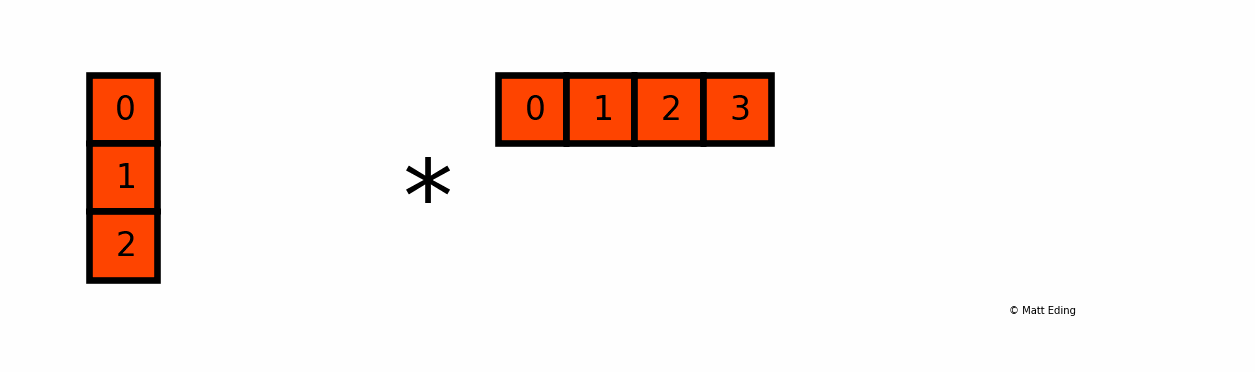

Broadcasting is NumPy's mechanism for performing element-wise operations between arrays that don't share identical shapes. Rather than forcing you to manually reshape arrays or write explicit loops, NumPy "stretches" the smaller arrays to match the larger ones during computation, but in a memory-efficient and temporary manner (behind the scenes NumPy magic).

### Breaking It Down

NumPy evaluates compatibility by evaluating array shapes from right to left, starting with the trailing dimensions. This rightward-first approach is similar to how we naturally think about nested structures, where the innermost elements are processed first.

For example, if we look at the at the case
```python
Array A: (3, 1, 4)
Array B:    (2, 4)
```
We can break this down from the eyes of NumPy as
```python
A: 3 × 1 × 4
B:     2 × 4
```
Now, putting yourself in the shoes in the eyes of a NumPy computer, working from right to left, dimension 4 matches dimension 4 perfectly. Dimension 1 can stretch to match dimension 2 (this is important that the dimension is one). The leftmost dimension 3 has no counterpart in B, so B conceptually gains a dimension of size 1 that can stretch to 3.

**The Rules of Stretching!**

A dimension can be broadcast when either array has size 1 in that position, because a single value can be logically repeated to fill any length. When one array lacks a dimension entirely, NumPy treats it as having size 1 in that position, making it eligible for stretching.

Broadcasting might seem amazing and the catch all to all of our ails, but the rules are pretty specific. For example, many people will finish reading this section (if you even did), and think that the array `(3, 4)` can be broadcast with the array `(2, 4)`. However, the `(3, 4)` array cannot broadcast with a `(2, 4)` array because neither the 3 nor the 2 is equal to 1, making them incompatible for stretching.

In [11]:
# Base experimental data
base_measurements = np.array([[10, 20, 30],
                             [40, 50, 60],
                             [70, 80, 90]])

# Single calibration offset (scalar)
calibration_offset = 5
calibrated_data = base_measurements + calibration_offset

print("Original measurements:")
print(base_measurements)
print("\nAfter calibration (+5):")
print(calibrated_data)

# Daily correction factors (1D array broadcast to 2D)
daily_corrections = np.array([1.1, 1.0, 0.9])  # 3 correction factors
corrected_data = base_measurements * daily_corrections  # Broadcast vertically

print("\nAfter daily corrections:")
print(corrected_data)

Original measurements:
[[10 20 30]
 [40 50 60]
 [70 80 90]]

After calibration (+5):
[[15 25 35]
 [45 55 65]
 [75 85 95]]

After daily corrections:
[[11. 20. 27.]
 [44. 50. 54.]
 [77. 80. 81.]]


### **[TODO] ✅ Apply Laboratory-Wide Corrections**

Our research facility has collected some data from our underwater sensors. We need to calibrate the data and correct the readings for time-drift. Your job is to:
1. Apply sensor calibrations (multiply each sensor's data by its calibration factor)
2. Apply time corrections (multiply each time period by its correction factor)
3. Calculate the final corrected data and print it
4. Print the shape to verify the result



In [12]:
# Research facility collected data from 4 sensors over 6 time periods
sensor_data = np.array([[12.1, 13.5, 14.2, 13.8, 12.9, 13.7],
                       [25.3, 26.1, 25.9, 26.4, 25.7, 26.0],
                       [38.7, 39.2, 38.9, 39.1, 38.8, 39.0],
                       [51.2, 52.1, 51.8, 52.3, 51.9, 52.0]])

# Individual sensor calibration factors
sensor_calibrations = np.array([0.95, 1.02, 0.98, 1.01])

# Time-based drift corrections
time_corrections = np.array([1.00, 1.01, 1.02, 1.01, 1.00, 0.99])

# Your code here:
calibrated_data = sensor_data * sensor_calibrations[:,np.newaxis]
corrected_data = calibrated_data * time_corrections

print("Final corrected data:")
print(corrected_data)
print("\nShape of corrected data:", corrected_data.shape)

Final corrected data:
[[11.495   12.95325 13.7598  13.2411  12.255   12.88485]
 [25.806   26.88822 26.94636 27.19728 26.214   26.2548 ]
 [37.926   38.80016 38.88444 38.70118 38.024   37.8378 ]
 [51.712   53.14721 53.36436 53.35123 52.419   51.9948 ]]

Shape of corrected data: (4, 6)


## Random Number Generation: Simulating Experiments
Controlled Randomness for Computational Work
Random number generation techniques is essential for initalizing your weights and biases.

Types of random distributions:

- Uniform: Equal probability across a range
- Normal (Gaussian): Bell curve distribution, common in nature
- Random integers: Discrete values within a range
- Random choice: Selecting from a predefined set of options

Important: Always set a random seed (`np.random.seed()`) when you need reproducible results.

In [13]:
# Set random seed for reproducibility
np.random.seed(123)

# Different types of random data generation
uniform_samples = np.random.uniform(0, 10, size=8)           # Uniform distribution
normal_samples = np.random.normal(25, 3, size=8)            # Normal distribution
integer_samples = np.random.randint(1, 100, size=8)         # Random integers

print("Uniform samples (0-10):", uniform_samples.round(2))
print("Normal samples (μ=25, σ=3):", normal_samples.round(2))
print("Integer samples (1-99):", integer_samples)

# Random matrix for simulation
simulation_matrix = np.random.randn(3, 4)  # Standard normal distribution
print("\nSimulation matrix:")
print(simulation_matrix.round(3))

Uniform samples (0-10): [6.96 2.86 2.27 5.51 7.19 4.23 9.81 6.85]
Normal samples (μ=25, σ=3): [17.72 23.71 28.8  22.4  22.96 24.72 29.47 23.08]
Integer samples (1-99): [56 68  3 85 40 67 85 48]

Simulation matrix:
[[ 1.004  0.386  0.737  1.491]
 [-0.936  1.176 -1.254 -0.638]
 [ 0.907 -1.429 -0.14  -0.862]]


### **[TODO] ✅ Design a Simulation Experiment**

Design a simulation for our testing measurement equipment:
1. Generate `baseline_readings` - 20 measurements from normal distribution (μ=50, σ=2)
2. Generate `noise_factors` - 20 values from uniform distribution (0.8 to 1.2)
3. Calculate `noisy_readings` - multiply `baseline_readings` by `noise_factors`
4. Calculate and print the mean and std of both baseline and noisy readings

In [14]:
# Your code here:
baseline_readings = np.random.normal(50, 2, size=20)
noise_factors = np.random.uniform(0.8, 1.2, size=20)
noisy_readings = baseline_readings * noise_factors

mean_baseline = np.mean(baseline_readings)
std_baseline = np.std(baseline_readings)
mean_noisy = np.mean(noisy_readings)
std_noisy = np.std(noisy_readings)

print("Mean_baseline:", mean_baseline)
print("Std_baseline:", std_baseline)
print("Mean_noisy:", mean_noisy)
print("Std_noisy:", std_noisy)

Mean_baseline: 49.932215292533314
Std_baseline: 2.4418051710553206
Mean_noisy: 50.68383777427084
Std_noisy: 5.778954637970482


## **[TODO] ✅ Putting it all Together**

Congratulations! You've mastered the essential NumPy tools for the Deep Research Facility. Now let's put it all together in a comprehensive challenge.

**Complete the following comprehensive analysis:**
1. Clean the data by replacing -999 values with the mean of valid readings for each sensor
2. Calculate hourly averages across all sensors (24 values)
3. Calculate sensor reliability (percentage of valid readings per sensor)
4. Find the sensor with highest and lowest average readings
5. Identify hours where average readings exceeded 110
6. Calculate the correlation between sensor 0 and sensor 1 (using valid data only)
  -  Hint: Use `np.corrcoef` to calculate the coefficient and make sure to extract the correct value from the output array
7. Create a summary report printing all findings

In [15]:
# The facility has collected data from a multi-sensor experiment
# 5 sensors, 24 hour periods, with some data quality issues

# Generate realistic sensor data with some issues
perfect_data = np.random.normal(100, 10, size=(5, 24))
noise = np.random.normal(0, 2, size=(5, 24))
sensor_data = perfect_data + noise

# Introduce some sensor malfunctions (set random values to -999)
malfunction_indices = np.random.choice(120, size=12, replace=False)
sensor_data.flat[malfunction_indices] = -999

print("Raw sensor data shape:", sensor_data.shape)
print("\nSample of raw data (first 3 sensors, first 8 hours):\n", sensor_data[:3, :8])

# Your code here:
#1
cleaned_data = sensor_data.copy()
for i in range(cleaned_data.shape[0]):
  valid_data = cleaned_data[i][cleaned_data[i] != -999]
  mean_valid = np.mean(valid_data)
  cleaned_data[i][cleaned_data[i] == -999] = mean_valid
#2
hourly_avg = np.mean(cleaned_data, axis=0)
#3
sensor_reliability = []
for i in range(sensor_data.shape[0]):
  count_valid = np.sum(sensor_data[i] != -999)
  count_total = np.sum(sensor_data.shape[1])
  sensor_reliability.append(count_valid / count_total *100)
#4
sensor_mean = np.mean(cleaned_data, axis=1)
max_avg = np.argmax(sensor_mean)
min_avg = np.argmin(sensor_mean)
#5
hours_above_110 = np.where(hourly_avg > 110)
#6
correlation = np.corrcoef(cleaned_data[0], cleaned_data[1])
correlation = correlation[0, 1]
#7
print("Cleaned data :", cleaned_data)
print("Hourly averages :", hourly_avg)
print("Sensor reliability :", sensor_reliability)
print("Sensor with highest average :", max_avg)
print("Sensor with lowest average :", min_avg)
print("Hours with average above 110 :", hours_above_110)
print("Correlation between sensor 0 and sensor 1 :", correlation)




Raw sensor data shape: (5, 24)

Sample of raw data (first 3 sensors, first 8 hours):
 [[  99.35705998 -999.           87.30733964  102.77840922  105.03877585
    91.62851414  112.02120471   88.77573399]
 [ 112.66113866   88.48585907 -999.          108.94645488   95.31168713
   113.53553067   90.94643751   87.10452373]
 [-999.          101.91907552   88.35547473   96.28656179  120.78225393
    79.3513176    97.82388864   95.03824463]]
Cleaned data : [[ 99.35705998  98.46823529  87.30733964 102.77840922 105.03877585
   91.62851414 112.02120471  88.77573399  79.16303436 103.93516089
   98.46823529  98.5180027   90.94230934  83.50447987 113.95899398
   91.9150995  121.01092908 109.44967572  96.83980403  88.72765138
   92.50233556  86.04415455 120.68072852 102.20177934]
 [112.66113866  88.48585907  97.92791055 108.94645488  95.31168713
  113.53553067  90.94643751  87.10452373 102.27141763  96.21552596
  103.90920952  79.11724693 106.63223967  97.92791055  97.92791055
   97.50396946 100.0646

# **TensorFlow & Keras Fundamentals**

Our DL toolkit consists of TensorFlow and Keras - the industry-standard frameworks for building and training neural networks.

TensorFlow handles the low-level computational graphs and automatic differentiation, while Keras provides the high-level, user-friendly API for building models. Think of TensorFlow as the engine and Keras as the steering wheel.

In [16]:
import tensorflow as tf
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.19.0


## **TensorFlow Fundamentals: Tensors and Variables**

Tensors are the fundamental data structure in TensorFlow - multi-dimensional arrays optimized for mathematical operations. Unlike NumPy arrays, TensorFlow tensors can run on GPUs and support automatic differentiation.

In [17]:
# Creating tensors
scalar_tensor = tf.constant(42.0)                    # 0D tensor (scalar)
vector_tensor = tf.constant([1.0, 2.0, 3.0])        # 1D tensor (vector)
matrix_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]]) # 2D tensor (matrix)

print("Scalar shape:", scalar_tensor.shape)
print("Vector shape:", vector_tensor.shape)
print("Matrix shape:", matrix_tensor.shape)

# Tensor operations
neural_weights = tf.random.normal((3, 4), mean=0.0, stddev=0.1)
neural_biases = tf.zeros(4)

print("\nNeural weights shape:", neural_weights.shape)
print("Neural biases shape:", neural_biases.shape)

Scalar shape: ()
Vector shape: (3,)
Matrix shape: (2, 2)

Neural weights shape: (3, 4)
Neural biases shape: (4,)


**Variables: Trainable Parameters**

Variables are special tensors that can be modified during training. These represent the learnable parameters of your neural network - the weights and biases that the model adjusts to learn patterns in your data.
Key differences between Variables and regular tensors:

- Mutable: Variables can be changed after creation, regular tensors cannot
- Persistent: Variables persist across multiple function calls
- Trainable: Variables participate in gradient computation by default
- Optimizable: Optimizers can automatically update Variables during training

What makes a parameter "trainable"?

- The `trainable` attribute determines whether the optimizer will update this Variable
- `trainable=True` (default): Parameter will be updated during training
- `trainable=False`: Parameter stays fixed (useful for frozen layers or learned statistics)

In [18]:
# Creating trainable variables
network_weights = tf.Variable(tf.random.normal((10, 5)), name="network_weights")
network_biases = tf.Variable(tf.zeros(5), name="network_biases")

print("Weights are trainable:", network_weights.trainable)
print("Initial weight values:")
print(network_weights.numpy()[:3, :])  # Show first 3 rows

# Variables can be updated using assign method
network_biases.assign([0.1, 0.2, 0.3, 0.4, 0.5])
print("\nUpdated biases:", network_biases.numpy())

Weights are trainable: True
Initial weight values:
[[ 8.4224582e-02 -8.6090374e-01  3.7812304e-01 -5.1962738e-03
  -4.9453196e-01]
 [ 6.1781919e-01 -3.3082047e-01 -1.3840806e-03 -4.2373410e-01
  -1.3872087e+00]
 [-1.5488191e+00 -5.3198391e-01 -4.4756433e-01 -2.0115814e+00
  -5.7926011e-01]]

Updated biases: [0.1 0.2 0.3 0.4 0.5]


## **Layers: Building Blocks of Neural Networks**

A big draw of Tensorflow is its ability to train various components during an optimization routine. This is largely facilitated by the Keras sub-library. Using Keras allows us to quickly create different neural network layers without having to write it all out by hand.

Layers are the fundamental building blocks of neural networks. Each layer applies a specific transformation to its input. Keras provides pre-built layers that handle weight initialization, forward passes, and gradient computation automatically.

When working with layers, you need to make sure:
1. You initalize the layer with the proper parameters to specify its output dimension and parameters
  - `units`: The number of neurons (nodes) in the layer. More units = more capacity to learn complex patterns, but also more parameters to train
  - `activation` (optional): The activation function can be passed in as a parameter or you can explitly call the activation functons as their own layers
  - `name` (optional): You can specify a name for the layer which makes debugging much easier
  - `input_shape` (optional) You can set an optional `input_shape` parameter for the first layer of the network so Keras knows the input shape
2. Once the layer has been initalized, you can then simply call the **object** with the input matrix as the parameter

Here you can find the documentation for the [Dense layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense). A Dense layer by itself is known as a perceptron, if we stack multiple of these layers together we get a Multi-Layer Perceptron (MLP).

Let's take a look at how we can initialize some of these layers in practice.

In [19]:
# Dense (fully connected) layer
hidden_layer = tf.keras.layers.Dense(units=64, activation='relu', name='hidden_layer')
output_layer = tf.keras.layers.Dense(units=10, activation='softmax', name='output_layer')

# Create sample input data
sample_input = tf.random.normal((32, 100))  # Batch of 32 samples, 100 features each

# Pass data through layers
hidden_output = hidden_layer(sample_input)
final_output = output_layer(hidden_output)

print("Input shape:", sample_input.shape)
print("Hidden layer output shape:", hidden_output.shape)
print("Final output shape:", final_output.shape)

# Examine layer weights
print("\nHidden layer weights shape:", hidden_layer.weights[0].shape)  # Weights
print("Hidden layer bias shape:", hidden_layer.weights[1].shape)      # Biases

Input shape: (32, 100)
Hidden layer output shape: (32, 64)
Final output shape: (32, 10)

Hidden layer weights shape: (100, 64)
Hidden layer bias shape: (64,)


### **[TODO] ✅ Build Neural Network Layers**

Your job is to now create parameters and a sequence of layers for neural classification:
1. Create `input_weights` - a Variable with random normal values and shape (784, 128)
1. Create `input_layer` - Dense layer with 64 units, `activation='relu'`
2. Create `hidden_layer` - Dense layer with 32 units, `activation='relu'`
3. Create `dropout` - Dropout layer with rate=0.3
4. Create `output_layer` - Dense layer with 3 units, `activation='softmax'`
5. Process `input_weights` through all layers and print shapes at each step


In [20]:
# Your code here
input_weights = tf.Variable(tf.random.normal((784, 128)))
input_layer = tf.keras.layers.Dense(64, activation='relu')
hidden_layer = tf.keras.layers.Dense(32, activation='relu')
dropout = tf.keras.layers.Dropout(0.3)
output_layer = tf.keras.layers.Dense(3, activation='softmax')

input_weights_output = input_layer(input_weights)
hidden_layer_output = hidden_layer(input_weights_output)
dropout_output = dropout(hidden_layer_output)
output_layer_output = output_layer(dropout_output)

print("Input weights shape:", input_weights.shape)
print("Input layer output shape:", input_weights_output.shape)
print("Hidden layer output shape:", hidden_layer_output.shape)
print("Dropout output shape:", dropout_output.shape)
print("Output layer output shape:", output_layer_output.shape)

Input weights shape: (784, 128)
Input layer output shape: (784, 64)
Hidden layer output shape: (784, 32)
Dropout output shape: (784, 32)
Output layer output shape: (784, 3)


## **Models: Organizing Your Neural Architecture**

Models are a way of organizing your layers into one cohesive architecture. This dictates the flow of data in your model and how information will be processed. There are a few ways of organizing your models, all with differing degrees of customizability, but we will discuss the most common 2
1. Sequential Models
2. Custom Models

Before we dive into each of these, let's go over some useful built-ins that make working with models easier. All of these are of the type `tf.keras.Model` which has some helpful properties:
- Model Summary: You can generate a detailed view of the model's structure, parameters, and data flow by calling `model.summary()`
  - NOTE: `summary()` only works after the model knows its input shape since TensorFlow uses lazy initialization. You can build a model using `model.build(input_shape)` or by specifying the `input_shape` upon initalization
- Layer Management: You can access the model's internal register of layers through the `model.layers` attribute
- Parameter Management: All trainable parameters (weights and biases) across your layers are automatically collected into `model.trainable_variables` and `model.variables` properties.



### **Sequential Models**

Sequential models are the simplest way to build neural networks when you have a linear stack of layers where data flows from input to output through each layer in sequence. Think of it as a pipeline where each layer processes the output of the previous layer.

In [21]:
# Building a sequential model
classification_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3), # Don't worry about this yet!
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
], name='classification_model')

# Model summary is a very useful way to track params and layers
classification_model.summary()

# Test the model
test_input = tf.random.normal((5, 784))
predictions = classification_model(test_input)
print("\nPredictions shape:", predictions.shape)
print("Sample prediction:", predictions[0].numpy())

Model: "classification_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,866 (425.26 KB)

 Trainable params: 108,866 (425.26 KB)

 Non-trainable params: 0 (0.00 B)


Predictions shape: (5, 2)
Sample prediction: [0.26647007 0.7335299 ]


### **TODO: ✅ Design Neural Network Architectures**

Now your job is to create two models for the neural lab:
1. Sequential model called 'simple_classifier':
   - Dense layer: 256 units, activation relu, input_shape=(784,)
   - Dense layer: 128 units, activation relu
   - Dense layer: 10 units, activation softmax

2. Print summaries for the model

In [22]:
# Your code here:
simple_classifier = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ], name='simple_classifier')

simple_classifier.summary()

Model: "simple_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

## **Custom Models with tf.keras.Model**

Custom models give you complete control over the forward pass and allow you to implement complex architectures or custom behaviors that aren't possible with Sequential or Functional APIs. We can still are able to leverage the key functionality from Keras since we inherit from `tf.keras.Model`.

When you create a custom model, you define exactly how data flows through your network. The following methods are what

- `__init__`: Define all the layers your model will use (like setting up your laboratory equipment)
- `call`: Define how data flows through the layers (the actual experimental procedure)
- `get_config` (optional): For model serialization and saving

In [23]:
class NeuralLabModel(tf.keras.Model):
    def __init__(self, hidden_units, num_classes):

      # Always call the parent class constructor first
      super(NeuralLabModel, self).__init__()

      self.hidden_units = hidden_units
      self.num_classes = num_classes

      # Define all layers in __init__ - these become attributes of the model
      self.feature_extractor = tf.keras.layers.Dense(hidden_units, activation='relu')
      self.classifier = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs, training=None):
      """
      Defines the forward pass: how data flows through the model

      Args:
        inputs: Input tensor(s) to the model
        training: Boolean indicating if model is in training mode
          This affects layers like Dropout and BatchNorm

      Returns:
        Output tensor after processing through all layers
      """
      # Step 1: Extract features with ReLU activation
      x = self.feature_extractor(inputs)
      # Step 2: Final classification
      x = self.classifier(x)
      return x

    def get_config(self):
      """Return configuration dictionary for model saving/loading"""
      return {'hidden_units': self.hidden_units, 'num_classes': self.num_classes}

# Create and test custom model
custom_model = NeuralLabModel(hidden_units=128, num_classes=5)

# Test with sample data
test_data = tf.random.normal((10, 50))
output = custom_model(test_data, training=True)

custom_model.build(input_shape=(None, 50))
custom_model.summary()

Model: "neural_lab_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (10, 128)              │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (10, 5)                │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,173 (28.02 KB)

 Trainable params: 7,173 (28.02 KB)

 Non-trainable params: 0 (0.00 B)

### **[TODO] ✅ Create Your Custom Neural Architecture**

Create a custom model class called `ResearchNetwork`:
1. __init__ should take parameters: `input_dim`, `hidden_dim`, `output_dim`
2. Create these layers in `__init__`:
   - input_projection: `Dense(input_dim, activation='relu')`
   - hidden_layer1: `Dense(hidden_dim, activation='relu')`
   - hidden_layer2: `Dense(hidden_dim, activation='relu')`
   - output_layer: `Dense(output_dim, activation='linear')`
3. Implement `call()` method
   - `x1 = input_projection(inputs)`
   - `x2 = hidden_layer1(x1)`
   - `x3 = hidden_layer2(x2) + x2`  # Residual connection
   - `output = output_layer(x3)`
4. Create and test with sample data with an input shape (16, 64) and then print output shape

In [24]:
# Your code here:
class ResearchNetwork(tf.keras.Model):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(ResearchNetwork, self).__init__()

    self.input_dim = input_dim
    self.hidden_dim = hidden_dim
    self.output_dim = output_dim

    self.input_projection = tf.keras.layers.Dense(hidden_dim, activation='relu')
    self.hidden_layer1 = tf.keras.layers.Dense(hidden_dim, activation='relu')
    self.hidden_layer2 = tf.keras.layers.Dense(hidden_dim, activation= 'relu')
    self.output_layer = tf.keras.layers.Dense(output_dim, activation='linear')

  def call(self, inputs, training=None):
      x1 = self.input_projection(inputs)
      x2 = self.hidden_layer1(x1)
      x3 = self.hidden_layer2(x2) + x1
      output = self.output_layer(x3)
      return output

  def get_config(self):
    return {'input_dim': self.input_dim, 'hidden_dim': self.hidden_dim, 'output_dim': self.output_dim}

sample_input = tf.random.normal((16, 64))
custom_model = ResearchNetwork(input_dim=64, hidden_dim=128, output_dim=32)
output = custom_model(sample_input)
print("Output shape:", output.shape)

Output shape: (16, 32)


## Understanding Batching in Neural Networks

A batch is simply a collection of training examples processed together in the forward and backward pass. Instead of showing the network one example at a time, we show it many examples simultaneously. But what advantages this really does this really provide?

1. Computational Efficiency:

 - GPUs are designed for parallel operations since they excel at performing the same operation on many data points simultaneously
 - This makes matrix operations on batches are much more efficient than individual operations


2. Gradient Stability:

 - Individual training examples can have noisy gradients that point in different directions
 - Averaging gradients across multiple examples reduces this noise
 - Results in more stable and reliable parameter updates

3. Faster Training:

 - More data processed per parameter update
 - Fewer update steps needed to see the entire dataset
 - Better convergence properties

Now, when choosing a batch size, you also make a tradeoff between memory and speed.

 - Larger batches: More memory usage, but better GPU utilization and more stable gradients
 - Smaller batches: Less memory usage, but less efficient computation and noisier gradients

In [25]:
import time

# Single sample processing
single_sample = tf.random.normal((784,))        # One flattened 28x28 image
print("Single sample shape:", single_sample.shape)

# Batch processing
batch_of_samples = tf.random.normal((32, 784))  # 32 images processed together
print("Batch shape:", batch_of_samples.shape)

# We will use the custom model we defined earlier
model = NeuralLabModel(hidden_units=128, num_classes=10)

# Processing single sample (need to add batch dimension)
single_sample_batch = tf.expand_dims(single_sample, 0)  # Shape: (1, 784)
single_output = model(single_sample_batch)
print("\nSingle sample processing:")
print(f"Input shape: {single_sample_batch.shape}")
print(f"Output shape: {single_output.shape}")

# Processing entire batch at once
batch_output = model(batch_of_samples)
print("\nBatch processing:")
print(f"Input shape: {batch_of_samples.shape}")
print(f"Output shape: {batch_output.shape}")

# Key insight: The model processes all 32 samples in parallel!

# Time single-sample processing
start_time = time.time()
for i in range(32):
    _ = model(tf.expand_dims(batch_of_samples[i], 0))
single_time = time.time() - start_time

# Time batch processing
start_time = time.time()
_ = model(batch_of_samples)
batch_time = time.time() - start_time

print(f"\nTiming comparison:")
print(f"Processing 32 samples individually: {single_time:.4f} seconds")
print(f"Processing 32 samples as batch: {batch_time:.4f} seconds")
print(f"Speedup: {single_time/batch_time:.2f}x faster with batching!")

Single sample shape: (784,)
Batch shape: (32, 784)

Single sample processing:
Input shape: (1, 784)
Output shape: (1, 10)

Batch processing:
Input shape: (32, 784)
Output shape: (32, 10)

Timing comparison:
Processing 32 samples individually: 0.0912 seconds
Processing 32 samples as batch: 0.0029 seconds
Speedup: 31.71x faster with batching!


## GradientTape: Automatic Differentiation

GradientTape is TensorFlow's mechanism for automatic differentiation - the foundation of how neural networks learn. The GradientTape keeps track of the tensor computations that occur inside the tape and allows you to access gradients of individual tensors with respect to computed values.

- **Forward Pass Recording:** In order to perform automatic differentiation, TensorFlow uses the `GradientTape` to compute the gradient of computation during the forward pass with respect to a set of inputs and records this information onto the "tape"
- **Backward Pass:** Calling `GradientTape.gradient(target, sources)` runs a backward pass along the tape and computes the gradient components of each differentiable unit along the path from `target` to `source`
- **Chain Rule Application:** These gradients are accumulated and, per an optimization relying on the chain rule, combined into the resulting overall gradient


For now, this is all you need to know but fair warning, you will be **implementing GradientTape and the gradient method from scratch in BERAS.** We advise you to spend extra time to make sure you understand what this process of autodifferation is doing since it will be especially useful next week.

In [26]:
# More complex example: multiple variables
a = tf.Variable(2.0)
b = tf.Variable(3.0)

with tf.GradientTape() as tape:
    z = a**2 * b + a * b**2  # z = a²b + ab²

# Compute gradients with respect to both variables
grad_a, grad_b = tape.gradient(z, [a, b])

print(f"\nFunction: z = a²b + ab²")
print(f"At a = 2, b = 3:")
print(f"  z = {z.numpy()}")
print(f"  ∂z/∂a = {grad_a.numpy()}")
print(f"  ∂z/∂b = {grad_b.numpy()}")


Function: z = a²b + ab²
At a = 2, b = 3:
  z = 30.0
  ∂z/∂a = 21.0
  ∂z/∂b = 16.0


```python
∂z/∂a should be 2ab + b² = 2(2)(3) + 3² = 21
∂z/∂b should be a² + 2ab = 2² + 2(2)(3) = 16
```

**Computing Gradients for Neural Networks**

For neural networks, we need gradients of the loss function with respect to all trainable parameters (weights and biases). This is exactly what backpropagation does, and GradientTape automates the entire process.

When training networks, you should follow these steps:
1. Set-up the `GradientTape` scope and call the model's forward pass to obtain the model's logits
2. Still within the scope of `GradientTape`, compute the model's loss
3. Exit the scope of `GradientTape` to stop tracking operations and call `tape.gradient(target, sources)` to compute the gradients

In [27]:
# Neural network gradient example
model = NeuralLabModel(hidden_units=128, num_classes=5)

# Sample data
x_train = tf.random.normal((100, 10)) # 100 samples, 10 features
y_train = tf.random.uniform((100, 5)) # 100 samples, 10 features

# Forward pass with gradient recording
with tf.GradientTape() as tape:
    # Forward pass: compute predictions
    predictions = model(x_train, training=True)

    # Compute loss: how far off are our predictions?
    loss = tf.keras.losses.binary_crossentropy(y_train, predictions)
    mean_loss = tf.reduce_mean(loss) # Average loss across all samples

# Backward pass: compute gradients
gradients = tape.gradient(mean_loss, model.trainable_variables)

print("Number of gradient tensors:", len(gradients))
print("First layer weight gradients shape:", gradients[0].shape)
print("First layer bias gradients shape:", gradients[1].shape)

Number of gradient tensors: 4
First layer weight gradients shape: (10, 128)
First layer bias gradients shape: (128,)


What just happened:
1. Tape recorded: x_train -> Dense(32) -> ReLU -> Dense(1) -> Sigmoid -> Loss
2. Backward pass computed: ∂Loss/∂w₁, ∂Loss/∂b₁, ∂Loss/∂w₂, ∂Loss/∂b₂
3. Used chain rule through: ∂Loss/∂w₁ = ∂Loss/∂pred * ∂pred/∂sigmoid * ∂sigmoid/∂dense₂ * ∂dense₂/∂relu * ∂relu/∂dense₁ * ∂dense₁/∂w₁

## **One-Hot Encoding: A Quick Essential**
One-hot encoding converts categorical labels into binary vectors where only one element is "hot" (1) and all others are "cold" (0). This is essential because neural networks need numerical input, and one-hot encoding ensures no artificial ordering between categories.

In [28]:
# Quick one-hot encoding example
class_labels = tf.constant([0, 1, 2, 1, 0])  # 5 samples, 3 classes
one_hot = tf.one_hot(class_labels, depth=3)
print("Labels:", class_labels.numpy())
print("One-hot encoded:")
print(one_hot.numpy())
# [[1. 0. 0.]  # Class 0
#  [0. 1. 0.]  # Class 1
#  [0. 0. 1.]  # Class 2
#  [0. 1. 0.]  # Class 1
#  [1. 0. 0.]] # Class 0

Labels: [0 1 2 1 0]
One-hot encoded:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


```python
[1. 0. 0.]  # Class 0
[0. 1. 0.]  # Class 1  
[0. 0. 1.]  # Class 2
[0. 1. 0.]  # Class 1
[1. 0. 0.] # Class 0
```

# **Optimizers: The Learning Algorithms**

Optimizers determine how neural network parameters are updated based on gradients. Different optimizers have different strategies for navigating the loss landscape to find optimal parameters.

Let's implement and compare the four fundamental optimizers with their mathematical formulations. Each optimizer is able to handle local minima and noisy gradients differently.

## **Optimizing the Rosenbrock function**

In this lab, we will be testing optimization algorithms on the [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function).

$$
L_{RB}(\theta_1, \theta_2) = \big(a - \theta_1\big)^2 + b \times \big(\theta_2 - \theta_{\ 1}^{\ 2}\big)^2
$$

In our formulation:
- $\theta$ is the parameters of the loss function, and would be the weights if we were training a neural network. These are the values that the optimizer is allowed to modify while minimizing the loss.
- $a$ and $b$ are constants that are specified for the loss function (AKA *loss hyperparameters*).
  - You can assume default parameters $(a, b) = (1, 100)$

Run the following cells to plot a contour plot of this function. The Rosenbrock function features a narrow valley, and has a minimum value at (1, 1) *(marked with a point)*, so you'll be trying to get an optimizer to optimize towards that minimum. **bold text**



In [29]:
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

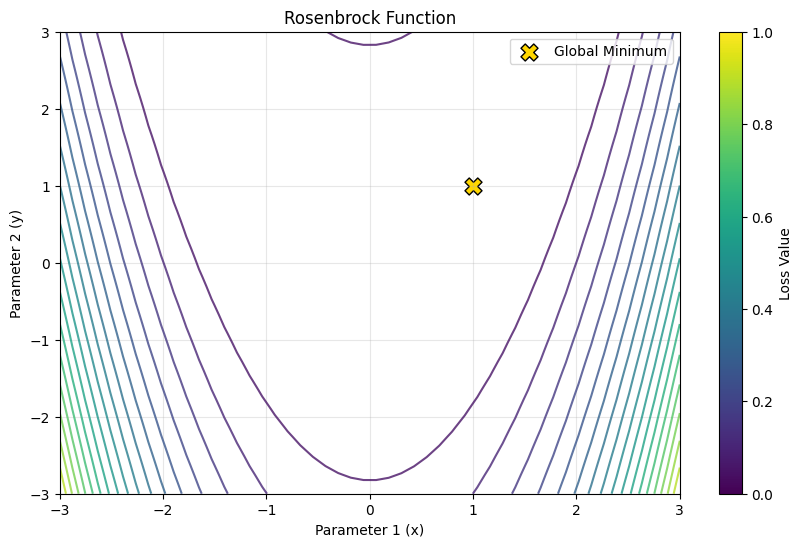

In [30]:
def optimize(custom_optimizer=None, keras_optimizer=None, loss_fn=rosenbrock, steps=1000, title="Rosenbrock Function"):
    optimizer1_name="Your Optimizer"
    optimizer2_name="Keras Optimizer"
    start_position=[-2.5, -2.5]

    # Create loss landscape
    x = np.linspace(-3, 3, 50)
    X, Y = np.meshgrid(x, x)
    Z = loss_fn(tf.constant(X, dtype=tf.float32), tf.constant(Y, dtype=tf.float32)).numpy()

    if not custom_optimizer:
        # Just plot landscape
        plt.figure(figsize=(10, 6))
        plt.contour(X, Y, Z, levels=20, alpha=0.8)
        plt.scatter(1, 1, color='gold', s=150, marker='X', label='Global Minimum', edgecolors='black')
        plt.title(title)
        plt.xlabel('Parameter 1 (x)')
        plt.ylabel('Parameter 2 (y)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.colorbar(label='Loss Value')
        plt.show()
        return None

    optimizers = [keras_optimizer, custom_optimizer]
    names = ['Keras Implementation', 'Your Implementation']
    colors = ['blue', 'red']
    active = [(opt, name, color) for opt, name, color in zip(optimizers, names, colors) if opt is not None]

    # Plot with optimizers
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    for i, (optimizer, name, color) in enumerate(active):
        ax = axes[i]
        ax.contour(X, Y, Z, levels=20, alpha=0.8)
        ax.scatter(1, 1, color='gold', s=150, marker='X', label='Global Minimum', edgecolors='black')

        # Run optimizer and track path
        position = tf.Variable([-2.5, -2.5], dtype=tf.float32)
        path = [position.numpy().copy()]

        for _ in range(steps):
            with tf.GradientTape() as tape:
                loss = loss_fn(tf.constant(position[0], dtype=tf.float32), tf.constant(position[1], dtype=tf.float32))
            gradient = tape.gradient(loss, position)
            optimizer.apply_gradients([(gradient, position)])
            path.append(position.numpy().copy())

        path = np.array(path)
        ax.plot(path[:, 0], path[:, 1], color, linewidth=2, alpha=0.8, label='Optimization Path')
        ax.scatter(*path[0], color='green', s=100, label='Start')
        ax.scatter(*path[-1], color='red', s=100, marker='*', label='End')

        ax.set_title(f"{title} - {name}")
        ax.set_xlabel('Parameter 1 (x)')
        ax.set_ylabel('Parameter 2 (y)')
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
    return None

optimize()

## **(Stochastic) Gradient Descent**

To train neural networks, we can change their parameters $\theta$ in a way to minimize a loss function. In order to decide what weight changes would best minimize the loss function, we calculate the gradient of the loss with respect to the parameters, which indicates the direction of steepest ascent.

Thus, we subtract the gradient scaled by some learning rate/scaling factor $\alpha$ and we arrive at the formula for gradient descent.

$$\theta_t = \theta_{t-1} - \alpha \nabla L(\theta_{t-1})$$

<br>

Though this formula might be very familiar, it does not represent specifically the procedure of Stochastic Gradient Descent, which is more accurate in describing the way deep networks are trained.

<br>

Revisiting our discussion about batches, standard "batch" gradient descent refers to evaluating the entire dataset and averaging the calculated gradients to update the weights. This is not used to train networks as not only is it very expensive to evaluate the gradient on the entire dataset for every iteration, this also generally leads the network to solutions that overfit and do not generalize.

Stochastic gradient descent is where random subsets, "mini-batches", of the training data are chosen to approximate the true gradient. Though it would increase stochasticity and decrease compute time to evaluate the gradient on single examples, the variance of gradient between single examples generally prevents the network from converging to neither quick nor effective solutions. Thus, the mini-batch size remains an important parameter that can make significant differences in the convergence, training time, or generalization of the network for non-trivial tasks.

## **Learn how to Implement an Optimizer**

Read the implementation below to see how to implement an optimizer. Notice that we are using  `parameters.assign` to update the parameters.

Notice the syntax for how we unpack the values in the `apply_gradients` function. `grads_and_vars` is expected to be a list of tuples of tensors.

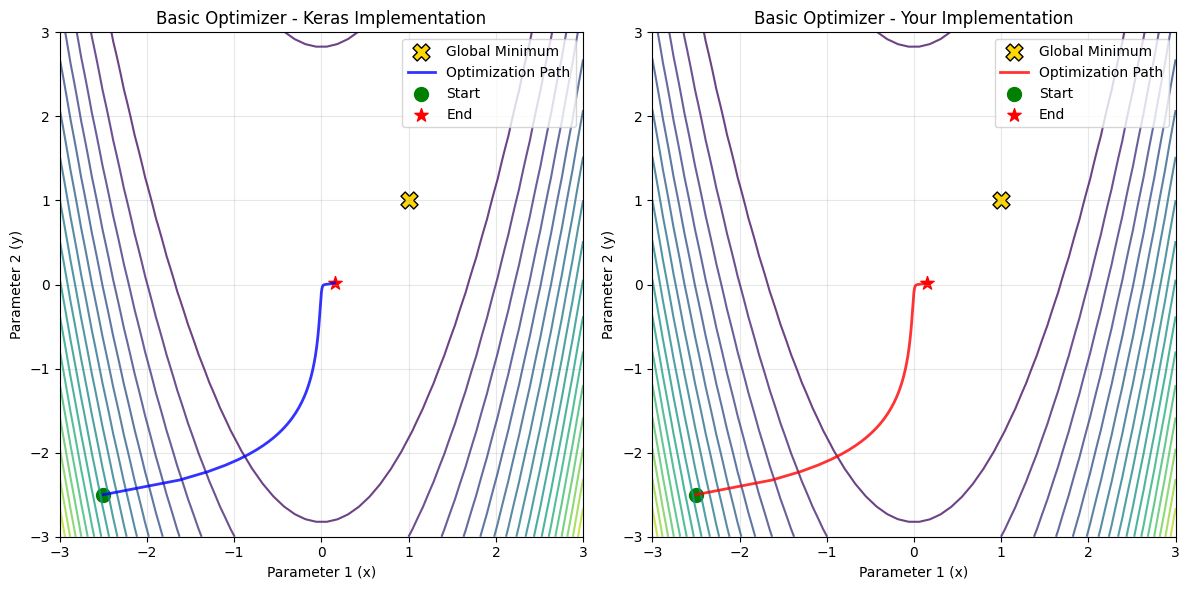

In [31]:
class SGD:
  def __init__(self, learning_rate):
    self.learning_rate = learning_rate

  def apply_gradients(self, grads_and_vars):
    gradients, parameters = grads_and_vars[0]
    parameters.assign(parameters - gradients*self.learning_rate)

# Our custom implementation of SGD plotted next to Keras
optimize(SGD(0.0001), tf.keras.optimizers.SGD(learning_rate=0.0001), title="Basic Optimizer")

## **[TODO] ✅ Implement Gradient Descent with Momentum**

Gradient descent can easily find the valley of the Rosenbrock function, but since the magnitude of the gradient is so low along the valley, gradient descent gets stuck.

With momentum, the parameters move by some fraction of the previous step along with the current gradient. This is similar to how a ball rolling down a hill will speed up over time.


$$v_t = \lambda v_{t-1} + \alpha \nabla L(\theta)$$

$$\theta_t = \theta_{t-1} - v_t$$

An additional variable $v$ is used to keep track of the velocity. When $\lambda = 0$, it's as if the ball is rolling on a frictionless surface, since it will keep all of it's previous velocity. A typical value for $\lambda$ is $0.9$.

**Implement gradient descent with momentum below. Check to see that your implementation matches the TensorFlow implementation.**

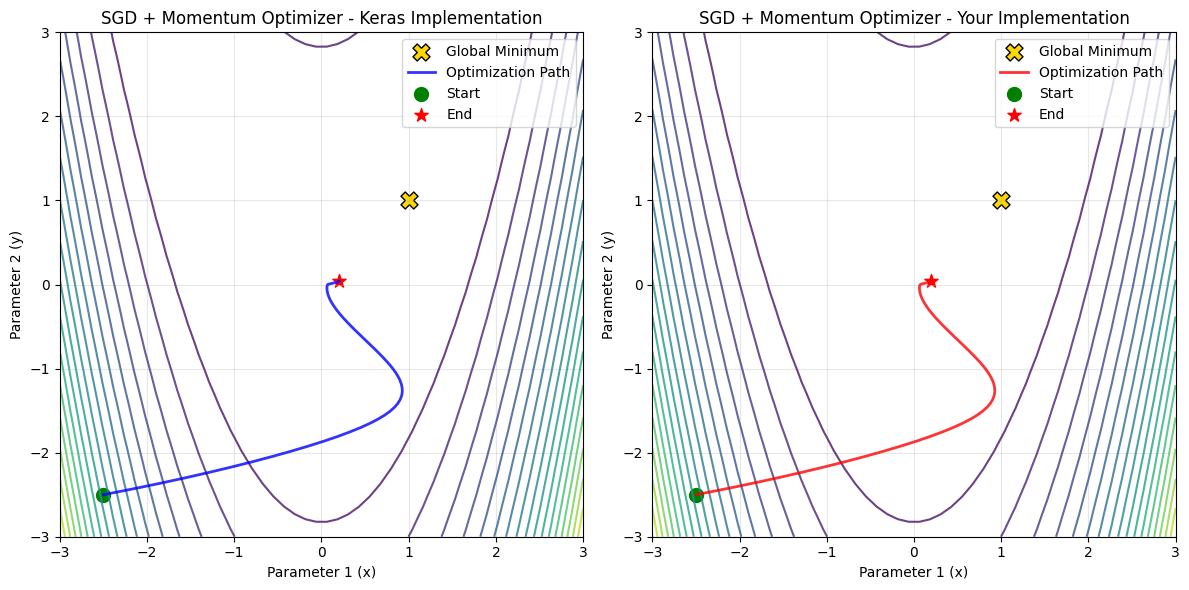

In [33]:
learning_rate = 0.00001
lambda_ = 0.9

# Your implementation of SGD with momentum
class SGDMomentum:
  def __init__(self, learning_rate):
    self.learning_rate = learning_rate
    self.v = 0  # Zero vector for velocity
    self.lambda_ = lambda_

  def apply_gradients(self, grads_and_vars):
    gradients, parameters = grads_and_vars[0]

    # TODO: Implement
    self.v = self.lambda_ * self.v + gradients * self.learning_rate
    parameters.assign(parameters - self.v)

optimize(SGDMomentum(learning_rate=learning_rate), tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=lambda_), title="SGD + Momentum Optimizer")

## **[TODO] ✅ Implement RMSProp**

RMSProp is similar to Adagrad, but seeks to solve the problem of the decaying learning rate. Instead of storing a sum of all of the past squared gradients, RMSprop keeps a exponentially decaying running average:

The running average is updated as follows:
$$ g_t^{(i)} =  \rho g_{t-1}^{(i)} + (1 - \rho)\Big(\frac{\partial}{\partial \theta^{(i)}}L(\theta_{t-1})\Big)^2 $$

Then, the parameter update is the same as for Adagrad. Dividing the learning rate by this exponential average will cause the learning to speed up in directions with lower gradients. This is what we want when navigating the valley of the Rosenbrock function.

$$
\theta_t^{(i)} = \theta_{t-1}^{(i)} - \frac{\alpha}{\sqrt{g^{(i)}_t} + \epsilon} * \frac{\partial}{\partial\theta^{(i)}}L(\theta_{t-1})
$$

**Implement RMSprop below, and check to see that your implementation matches the TensorFlow implementation:**

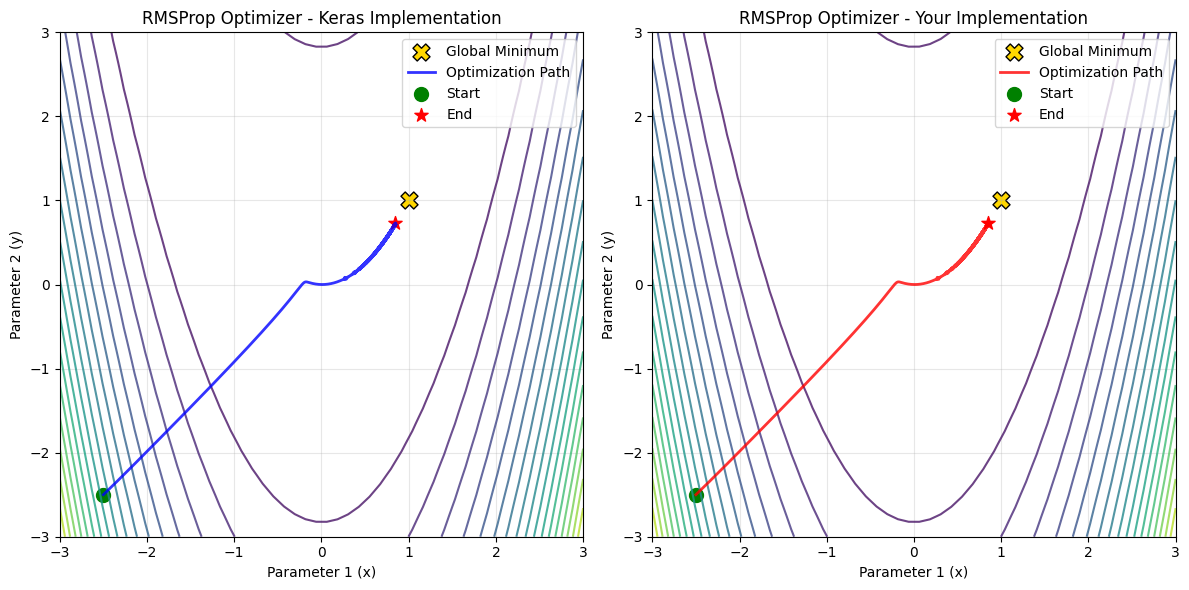

In [35]:
learning_rate=0.01

# Your implementation of RMS prop
class RMSprop:
  def __init__(self, learning_rate):
    self.learning_rate = learning_rate
    self.epsilon = 1e-7
    self.rho = 0.9  # Scaling factor for exponential average
    self.mean_square = 0  # Zero vector

  def apply_gradients(self, grads_and_vars):
    gradients, parameters = grads_and_vars[0]

    # TODO: Implement
    self.mean_square = self.rho * self.mean_square + (1 - self.rho) * gradients**2
    parameters.assign(parameters - self.learning_rate * gradients / (np.sqrt(self.mean_square) + self.epsilon))

optimize(RMSprop(learning_rate=learning_rate), tf.keras.optimizers.RMSprop(learning_rate=learning_rate), title="RMSProp Optimizer")

## **[TODO] ✅ Implement Adam (Adaptive Moment Estimation) Optimizer**

Adam is an iteration of previous algorithms which tries to estimate the first and second moments of the gradients.

The first moment is the expected value of the gradients, and the second moment is the expected value of the square of the gradients. Adam uses exponentially decaying averages to estimate these moments based on past gradients. $\beta_1$ and $\beta_2$ are the scaling factors for the exponential average, and the default values are $\beta_1=0.9$ and $\beta_2=0.999$.

$$m^{(i)}_t = \beta_1 m_{t-1} + (1 - \beta_1) \Big(\frac{\partial}{\partial \theta^{(i)}}L(\theta_{t-1})\Big)$$
$$v^{(i)}_t = \beta_2 v_{t-1} + (1 - \beta_2) \Big(\frac{\partial}{\partial \theta^{(i)}}L(\theta_{t-1})\Big)^2$$

However, these estimates are biased towards 0, so __when updating the parameters__ Adam scales them as follows:

$$\hat{m} = \frac{m}{1-\beta_1^t}$$

$$\hat{v} = \frac{v}{1-\beta_2^t}$$

(*Note:* the $t$ in the denominators of $\hat{m}$ and $\hat{v}$ is an exponentiation.)

The parameter update for Adam is then:

$$ \theta_t^{(i)} = \theta_{t-1}^{(i)} - \alpha * \frac{\hat{m}^{(i)}_t}{\sqrt{\hat{v}^{(i)}_t} + \epsilon} $$

Notice that the first moment is similar to the momentum in SGD with momentum, and the second moment is similar to the sum of squared gradients in RMSprop.

**Implement Adam below, and check to see that your implementation matches the TensorFlow implementation.**

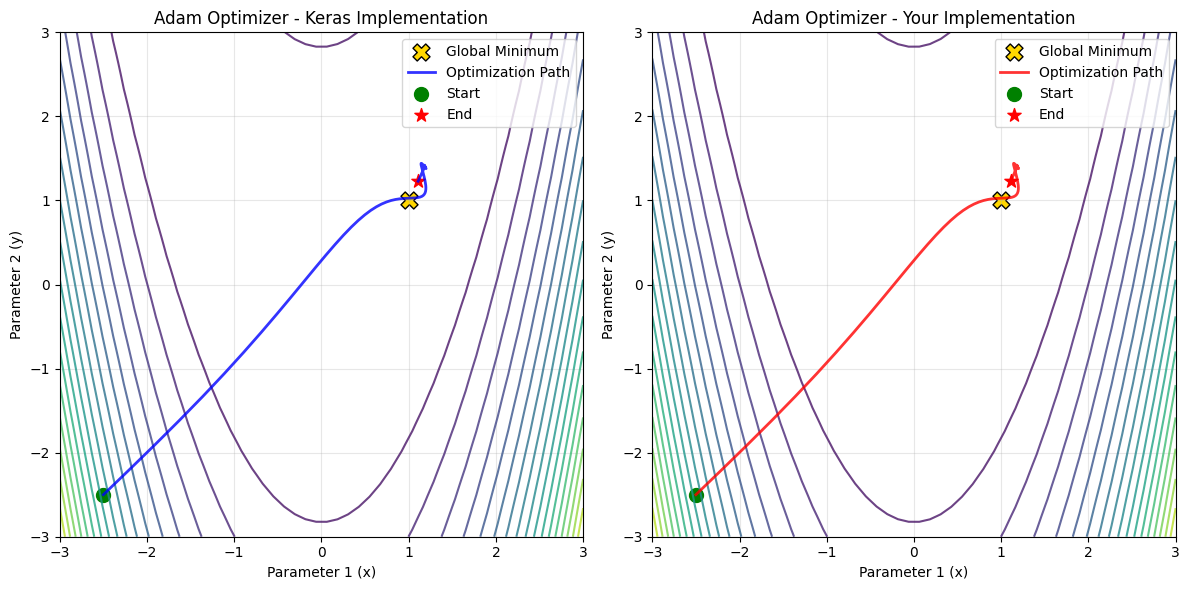

In [36]:
import collections
from collections import defaultdict

learning_rate=0.3

# Your implementation of Adam
class Adam:
  def __init__(self, learning_rate):
    self.learning_rate = learning_rate
    self.epsilon = 1e-7
    self.beta_1 = 0.9
    self.beta_2 = 0.999

    self.m = 0  # First moment zero vector
    self.v = 0  # Second moment zero vector.
    self.t = 0  # Time counter

  def apply_gradients(self, grads_and_vars):
    gradients, parameters = grads_and_vars[0]
    self.t += 1

    # TODO: Implement
    self.m = self.m * self.beta_1 + gradients * (1 - self.beta_1)
    self.v = self.v * self.beta_2 + gradients**2 * (1 - self.beta_2)

    # Bias correction
    m_hat = self.m / (1 - self.beta_1**self.t)
    v_hat = self.v / (1 - self.beta_2**self.t)

    # TODO: Compute m_hat and v_hat
    parameters.assign(parameters - self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon))


optimize(Adam(learning_rate=learning_rate), tf.keras.optimizers.Adam(learning_rate=learning_rate), title="Adam Optimizer")

# **Putting it All Together: Building a Model!**

You have now gone over all of the fundementals needed to prepare you to tackle the course. Both of these are large libraries which feel endless. In saying that, you should not worry if it feels like we barely scratched the surface since most things are a simple google search away.

Let's put everything we went over all together in one last TODO.


## [**TODO] ✅ Building Your First Real-World Classifier: MNIST Digit Recognition**

Congratulations! You've mastered the essential NumPy and TensorFlow tools for the Deep Research Facility. Now let's put it all together. You are tasked with building a neural network that can recognize handwritten digits from the famous MNIST dataset, as you have seen in class.

### **Understanding the MNIST Dataset**

The MNIST dataset contains 70,000 images of handwritten digits (0-9), each 28x28 pixels. This is a classic dataset in machine learning for a cornerstone representation of the power of deep learning.

**Let's take a look at a sample images and inspect the data attributes by running the follwing cell! You do not need to fill anything in, just run the cell and inspect the output**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
================= DATA ATTRIBUTES =====================
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Single image shape: (28, 28)
Pixel value range: 0 to 255


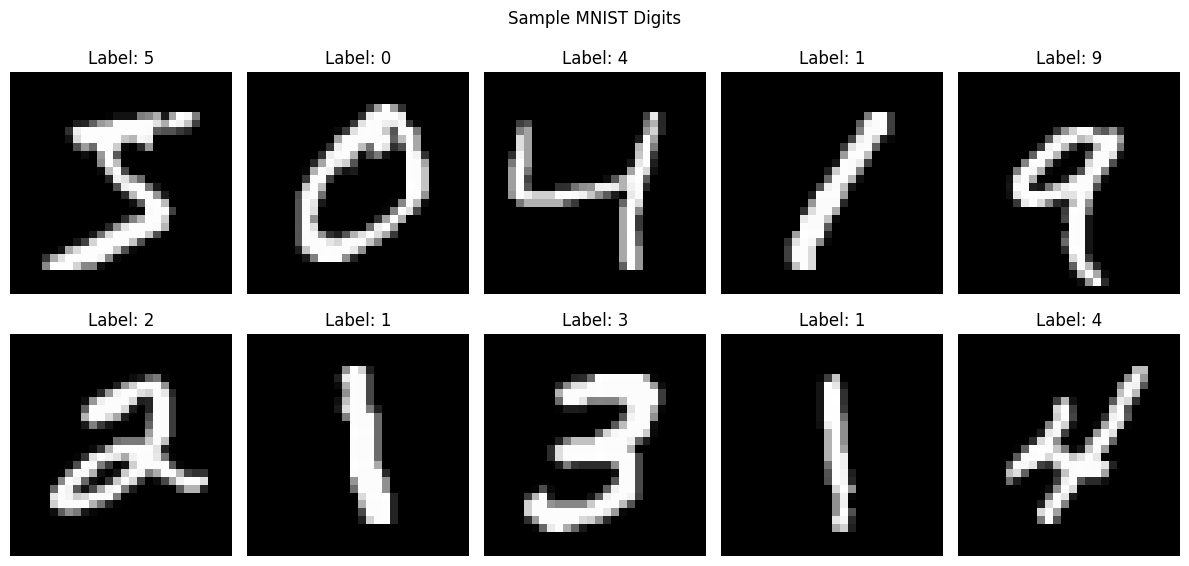

In [37]:
# Load the MNIST dataset using tensorflow (they have some nice datasets ready for use :)
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Let's print out some attributes about the data so we know what we are working with
print(f"================= DATA ATTRIBUTES =====================")
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Examine a single image in detail
print(f"Single image shape: {X_train[0].shape}")
print(f"Pixel value range: {X_train[0].min()} to {X_train[0].max()}")

print(f"=======================================================")

# Let's look at some example digits
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.suptitle('Sample MNIST Digits')
plt.tight_layout()
plt.show()

### **Preprocessing**
First, we need to preprocess our data. This means getting out data in the correct format for our model. We are training a perceptron which means our data needs to be in a specific format.

Neural networks work best with normalized, flattened data. We need to transform our 28x28 pixel images into the right format for our dense layers. We define the three key focuses of our preprocessing pipeline for MNIST:

- **Normalization**: Pixel values range from 0-255, but neural networks train better with values between 0-1
- **Flattening**: Our Dense layers expect 1D input, but images are 2D matrices
- **Data type**: We need consistent float32 tensors for TensorFlow



#### **[TODO] ✅ Fill in the following cell to complete the preprocessing necessary to transform the MNIST dataset**

In [41]:
def preprocess_images(images):
  normalized_images = images / 255.0
  flattened_images = normalized_images.reshape(normalized_images.shape[0], -1)
  final_images = flattened_images.astype(np.float32)
  return final_images

    # =============================================================
    # | TODO 1: Normalize pixel values from [0, 255] to [0, 1]    |
    # |                                                           |
    # | HINT: How can we easily divide all values without a loop? |
    # |       (ahem numpy array)                                  |
    # =============================================================

    # ===============================================================
    # | TODO 2: Flatten each 28x28 image into a 784-dimensional     |
    # |         vector.                                             |
    # | This transforms (num_samples, 28, 28) -> (num_samples, 784) |
    # | (ahem numpy array using reshape and think about how to keep)|
    # |  the same first dimension, but flatten second)              |
    # |                                                             |
    # | (HINT: If you use -1 as the trailing dimension, it collapses|
    # |  anything that comes after it and read to docs)             |
    # ===============================================================

    # ===============================================================
    # | TODO 3: Cast the flattened tensor to np.float32             |
    # | This transforms (num_samples, 28, 28) -> (num_samples, 784) |
    # |       (Hint: You can use astype(np.float32))                |
    # ===============================================================

Now run the following cell to inspect the results of your preprocessing function. The expected results are for a single example and are shown below. **Run the cell to make sure you get the same output.**

In [42]:
# Let's see the preprocessing in action
print("Before preprocessing:")
print(f"Shape: {X_train[0].shape}")
print(f"Data type: {X_train.dtype} {type(X_train)}")
print(f"Value range: {X_train[0].min()} to {X_train[0].max()}")

# Preprocess our data
X_train_processed = preprocess_images(X_train)
X_test_processed = preprocess_images(X_test)

print("\nAfter preprocessing:")
print(f"Shape: {X_train_processed[0].shape}")
print(f"Data type: {X_train_processed.dtype}")
print(f"Value range: {X_train_processed[0].min():.3f} to {X_train_processed[0].max():.3f}")

Before preprocessing:
Shape: (28, 28)
Data type: uint8 <class 'numpy.ndarray'>
Value range: 0 to 255

After preprocessing:
Shape: (784,)
Data type: float32
Value range: 0.000 to 1.000


```
Before preprocessing:
Shape: (28, 28)
Data type: uint8 <class 'numpy.ndarray'>
Value range: 0 to 255

After preprocessing:
Shape: (784,) # Flattened vector
Data type: float32 # correct datatype for tensor  
Value range: 0.000 to 1.000 # Now see only between [0, 1]
```

### **[TODO]** ✅ **Build Your MNIST Classifier**
Now it's time to build your classifier! You'll create a neural network that can distinguish between all 10 digits.

In [43]:
class MNISTClassifier(tf.keras.Model):
    def __init__(self):
        super(MNISTClassifier, self).__init__()

        # =================================================
        # | TODO 1: Define your layers                    |
        # |                                               |
        # | Your input will be 784 features (28*28)       |
        # | Your output should be 10 classes (digits 0-9) |
        # |                                               |
        # | Suggested architecture:                       |
        # | Input (784) -> Hidden1 (128) -> Hidden2 (64)  |
        # | -> Output (10)                                |
        # |                                               |
        # | Don't forget activation functions             |
        # | Use 'relu' for hidden layers and 'softmax'    |
        # | for the output layer                          |
        # =================================================

        self.hidden1 = tf.keras.layers.Dense(128, activation='relu')
        # TODO: Dense layer with 128 units and ReLU activation

        self.hidden2 = tf.keras.layers.Dense(64,activation='relu')
        # TODO: Dense layer with 64 units and ReLU activation

        self.output_layer = tf.keras.layers.Dense(10, activation='softmax')
        # TODO: Dense layer with 10 units and softmax activation

    def call(self, inputs):
        # =================================================
        # | TODO 2: Define the forward pass               |
        # |                                               |
        # | Pass the input through your layers in order   |
        # | Input -> Hidden1 -> Hidden2 -> Output         |
        # =================================================

        x = self.hidden1(inputs)
        # TODO: Pass inputs through hidden1

        x = self.hidden2(x)
        # TODO: Pass result through hidden2

        outputs = self.output_layer(x)
        # TODO: Pass result through output_layer

        return outputs

# =================================================
# | TODO 3: Initialize your model and optimizer   |
# =================================================

model = MNISTClassifier()# TODO: Create an instance of your MNISTClassifier

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)# TODO: Choose an optimizer (Adam with lr=0.001 works well)

Now that you have set up your architecture, we need to bring it all together with the training loop. This is the most important part that will orchestrate all of the parts we put together above into our final output.

Follow the TODOs in the code block below.

*You will notice we have provided you with the loss and accuracy functions. However, it is your to call the loss function! IMPORTANT: Read the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) on the order of parameters for the `call` method!*

In [44]:
# =================================================
# | TODO 4: Initialize your model and optimizer   |
# =================================================

model = MNISTClassifier()# TODO: Create an instance of your MNISTClassifier

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)# TODO: Choose an optimizer (HINT: Adam with lr=0.001 works well! USE KERAS)

train_steps = 1000                # Uncomment for quick run
# train_steps = 5000              # Uncomment for full run when ready
# train_steps = 10000             # If you need this, maybe check your architecture

# We will define the loss and accuracy using Keras for this model
categorical_crossentropy_loss = tf.keras.losses.CategoricalCrossentropy()
accuracy_metric = tf.keras.metrics.CategoricalAccuracy()

# Convert labels to one-hot encoding (necessary for mutli-class classification)
y_train_onehot = tf.one_hot(y_train, depth=10)
y_test_onehot = tf.one_hot(y_test, depth=10)

# A fun thing I always do is add in print lines to track model progress
print("Starting training...")

# NOTE: During BERAS, you will need to implement batching during
# your training loop. Here, we're processing one example at a time
# to keep things simple
for i in range(train_steps):

    # Get a random training example (this is jank)
    idx = np.random.randint(0, len(X_train_processed))

    # Get the data in the right shape (1 example at a time)
    X = X_train_processed[idx].reshape(1, -1)
    Y = y_train_onehot[idx].numpy().reshape(1, -1)

    # Convert to float32 tensors
    x = tf.cast(X, tf.float32)
    y = tf.cast(Y, tf.float32)

    # Training step with GradientTape
    with tf.GradientTape() as tape:

        # ============================
        # | TODO 5: Call your model. |
        # ============================
        predictions = model(x)# TODO: Get model predictions

        # Compute loss for this example
        # ============================
        # | TODO 6: Compute loss     |
        # ============================
        loss = categorical_crossentropy_loss(y, predictions)# TODO: Compute loss

        if i % 200 == 0:
            train_acc = accuracy_metric(y, predictions)
            # If your wondering more about the comments, you can read about f-strings and why we use conventions
            # such as .4f
            print(f"Step {i}/{train_steps} - Loss: {loss.numpy():.4f}, Accuracy: {train_acc.numpy():.4f}")

    # =================================================
    # | TODO 7: Compute and apply gradients           |
    # =================================================

    # The keras Model class has the trainable_variables property to conveniently
    # return all the trainable variables you'd want to adjust based on the gradients

    gradients = tape.gradient(loss,model.trainable_variables)# TODO: Compute gradients using tape.gradient()

    # IMPORTANT: Apply gradients using the optimizer you defined
    # This line is important! You will use this for every neural network!
    # You will be implementing this from scratch in the next assignment :)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

print("Training complete!")

# =============================================
# | TODO 7: Run the cell to train your model. |
# =============================================

Starting training...
Step 0/1000 - Loss: 2.1906, Accuracy: 0.0000
Step 200/1000 - Loss: 1.3211, Accuracy: 0.0000
Step 400/1000 - Loss: 0.1087, Accuracy: 0.3333
Step 600/1000 - Loss: 1.2054, Accuracy: 0.5000
Step 800/1000 - Loss: 0.0081, Accuracy: 0.6000
Training complete!


Ok, now we can test your model and see some fun predictions. Run the following cell which will do the following:
1. It will evaluate the model performance by running the test dataset over the trained model, tracking its accuracy
2. The `predict_digit` function will then run a single example and visualize the results so you can see your model in action :)

**There is nothing for you to fill in in this cell. Just run the block to see your output**

Test Accuracy on 1000 examples: 0.8480


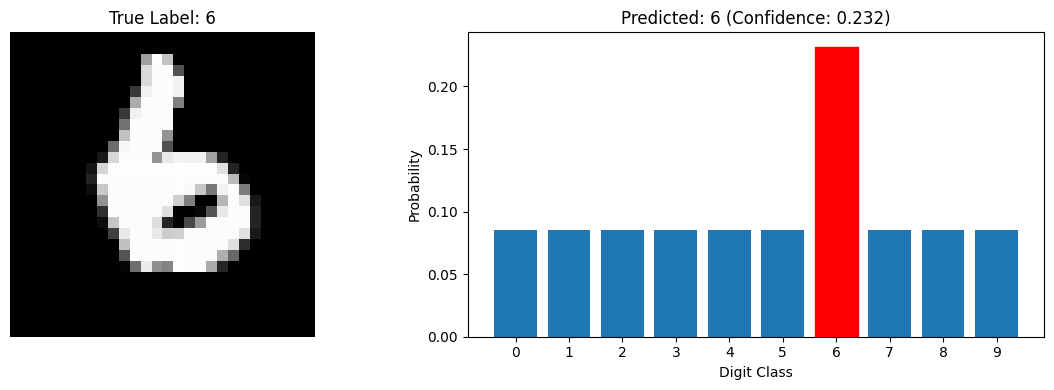

Example 1: Predicted 6 with 0.232 confidence


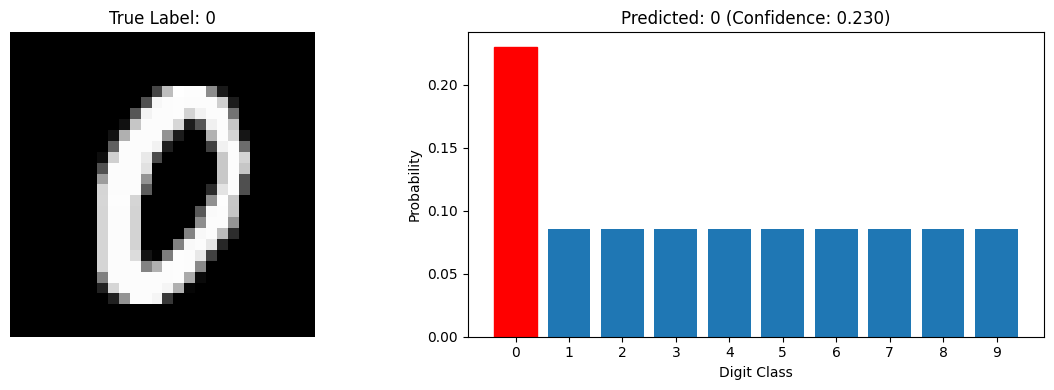

Example 2: Predicted 0 with 0.230 confidence


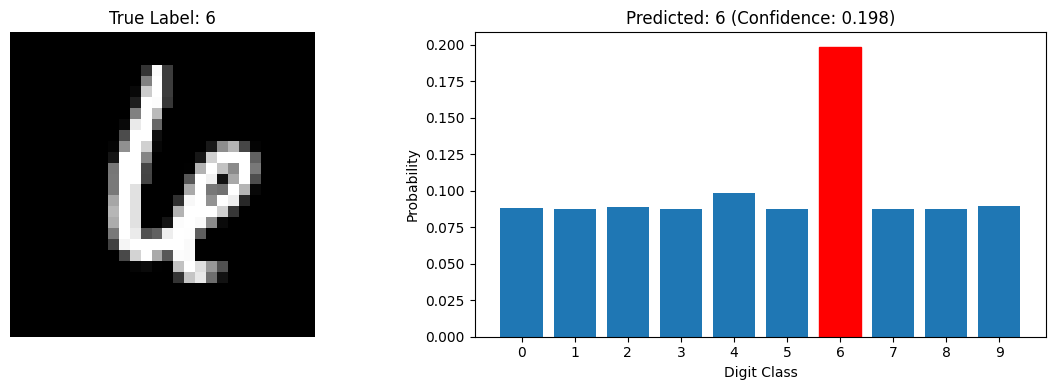

Example 3: Predicted 6 with 0.198 confidence


In [45]:
def predict_digit(image_index):
    # Get the image and true label
    image = X_test[image_index]
    true_label = y_test[image_index]

    # preprocess the image using your function
    processed_image = X_test_processed[image_index].reshape(1, -1)

    # prediction
    prediction = model(processed_image)
    predicted_class = tf.argmax(prediction, axis=1).numpy()[0]
    confidence = tf.nn.softmax(prediction).numpy()[0]

    # Visualize
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'True Label: {true_label}')
    plt.axis('off')

    # Show prediction probabilities
    plt.subplot(1, 2, 2)
    bars = plt.bar(range(10), confidence)
    bars[predicted_class].set_color('red')
    plt.title(f'Predicted: {predicted_class} (Confidence: {confidence[predicted_class]:.3f})')
    plt.xlabel('Digit Class')
    plt.ylabel('Probability')
    plt.xticks(range(10))

    plt.tight_layout()
    plt.show()

    return predicted_class, confidence[predicted_class]

# Only testing on a subset of 1000 examples
test_sample_size = 1000
correct_predictions = 0

for i in range(test_sample_size):
    x_test = X_test_processed[i].reshape(1, -1)
    y_true = y_test[i]

    prediction = model(x_test)
    predicted_class = tf.argmax(prediction, axis=1).numpy()[0]

    if predicted_class == y_true:
        correct_predictions += 1

accuracy = correct_predictions / test_sample_size
print(f"Test Accuracy on {test_sample_size} examples: {accuracy:.4f}")

for i in range(3):
    random_idx = np.random.randint(0, len(X_test))
    pred_class, confidence = predict_digit(random_idx)
    print(f"Example {i+1}: Predicted {pred_class} with {confidence:.3f} confidence")

You have now just implemented your first neural network for MNIST classification. On the next assignment, you will be implementing these constructs (Dense, GradientTape, Activations, etc.) from scratch in the next assignment, so make sure you understand how each of these work :)

# **Congrats** 🎉

Congrats on completing assignment 2! This was a big one recruits 🚀

You should now be comfortable working with `NumPy` and `TensorFlow` enough to complete the first assignment, BERAS, where we will be diving into many of the constructs we took for granted in this mini-project, such as `GradientTape`, `Dense` layers, `activations`, etc.